<a href="https://colab.research.google.com/github/Natali-PP/diplodatos2021/blob/main/AnalisiYVisualizacion/03_Distribuciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---

# Distribuciones

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Variables Categóricas


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


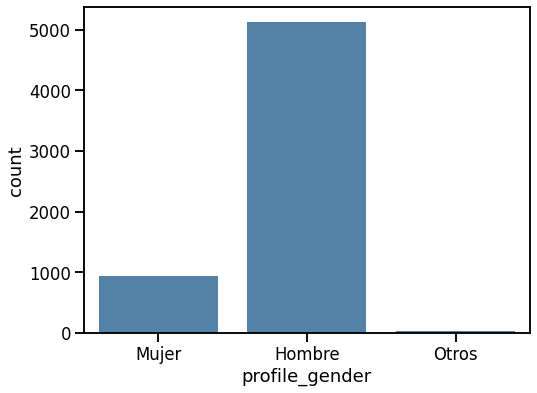

In [4]:
fig = plt.figure(figsize=(8,6))
seaborn.countplot(df.profile_gender, color='steelblue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


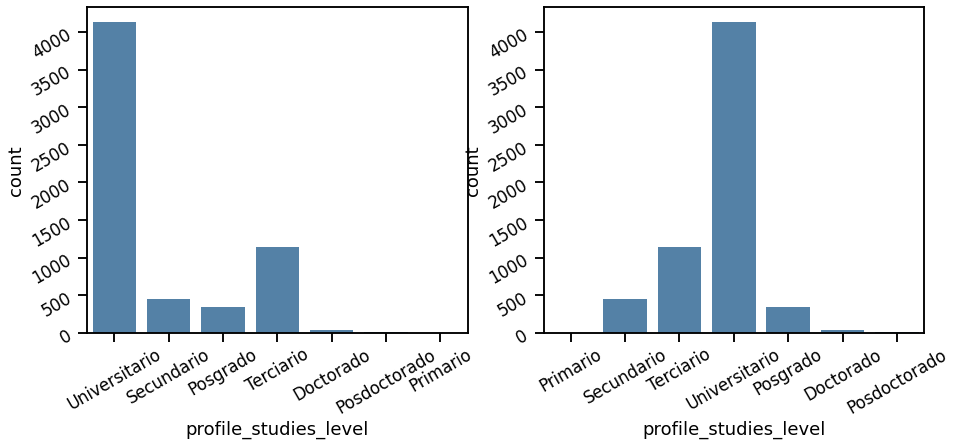

In [5]:
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado']
fig, axes = plt.subplots(ncols=2, figsize=(15,6))
g = seaborn.countplot(df.profile_studies_level, color='steelblue', ax=axes[0])
g = seaborn.countplot(df.profile_studies_level, color='steelblue', ax=axes[1],
                  order=sorted_studies_levels)
for ax in axes:
  ax.tick_params(labelrotation=30)

# Variables Numéricas


In [6]:
salary_col='salary_monthly_BRUTO'
#salary_col='salary_monthly_NETO'

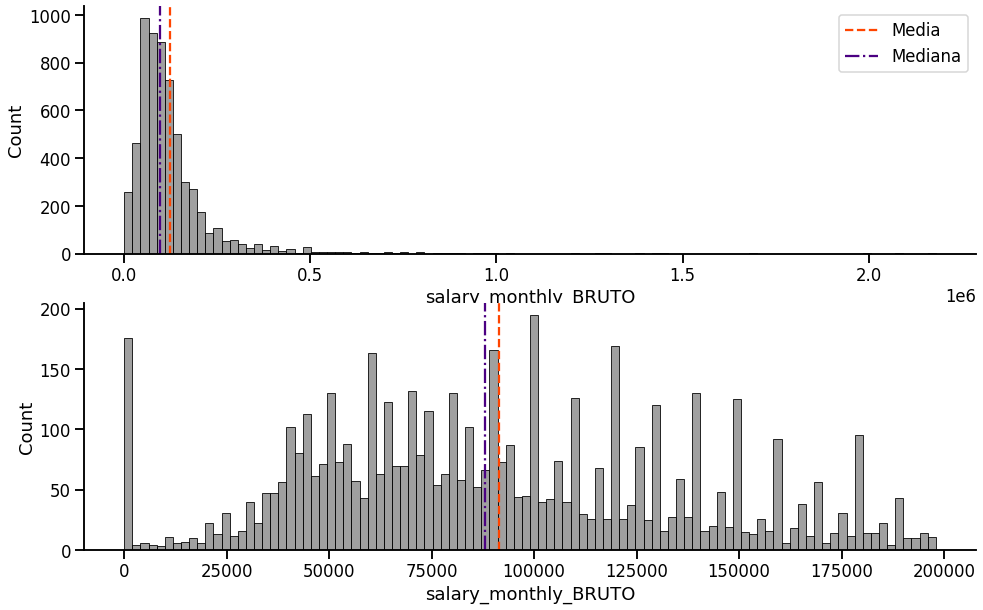

In [7]:
fig, axes = plt.subplots(nrows=2, figsize=(16, 10))
seaborn.histplot(df[salary_col], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

filtered_df = df[df[salary_col] < 200000]
seaborn.histplot(filtered_df[salary_col], bins=100, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

#Varias Variables



## Varias Categóricas

# Sección nueva

In [40]:
## Tabla de contingencia
pd.crosstab(df.profile_gender, df.profile_studies_level)#, normalize=True)

profile_studies_level,Doctorado,Posdoctorado,Posgrado,Primario,Secundario,Terciario,Universitario
profile_gender,,,,,,,
Hombre,19,4,256,2,424,970,3447
Mujer,8,0,85,0,24,158,667
Otros,3,0,1,0,1,7,19


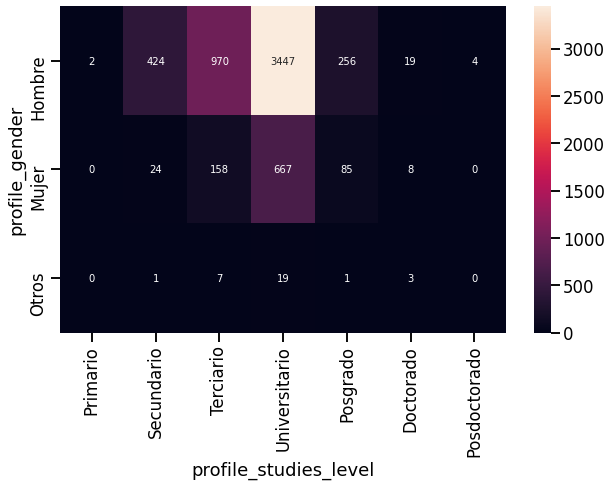

In [41]:
fig = plt.figure(figsize=(10,6))
exp = pd.crosstab(df.profile_gender,
                  df.profile_studies_level)[sorted_studies_levels]
seaborn.heatmap(exp, annot=True, fmt='g')

In [42]:
## Tabla de contingencia normalizada
pd.crosstab(df.profile_gender, df.profile_studies_level, normalize=True)

profile_studies_level,Doctorado,Posdoctorado,Posgrado,Primario,Secundario,Terciario,Universitario
profile_gender,,,,,,,
Hombre,0.003117,0.000656,0.042002,0.000328,0.069565,0.159147,0.565546
Mujer,0.001313,0.000000,0.013946,0.000000,0.003938,0.025923,0.109434
Otros,0.000492,0.000000,0.000164,0.000000,0.000164,0.001148,0.003117


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

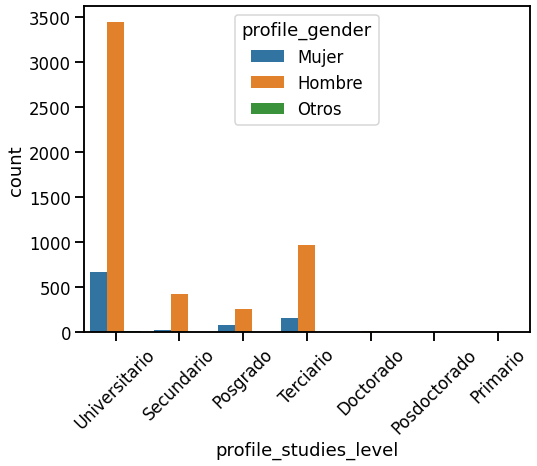

In [43]:
fig = plt.figure(figsize=(8,6))
seaborn.countplot(df.profile_studies_level,  hue=df.profile_gender )
plt.xticks(rotation=45)

## Varias numéricas

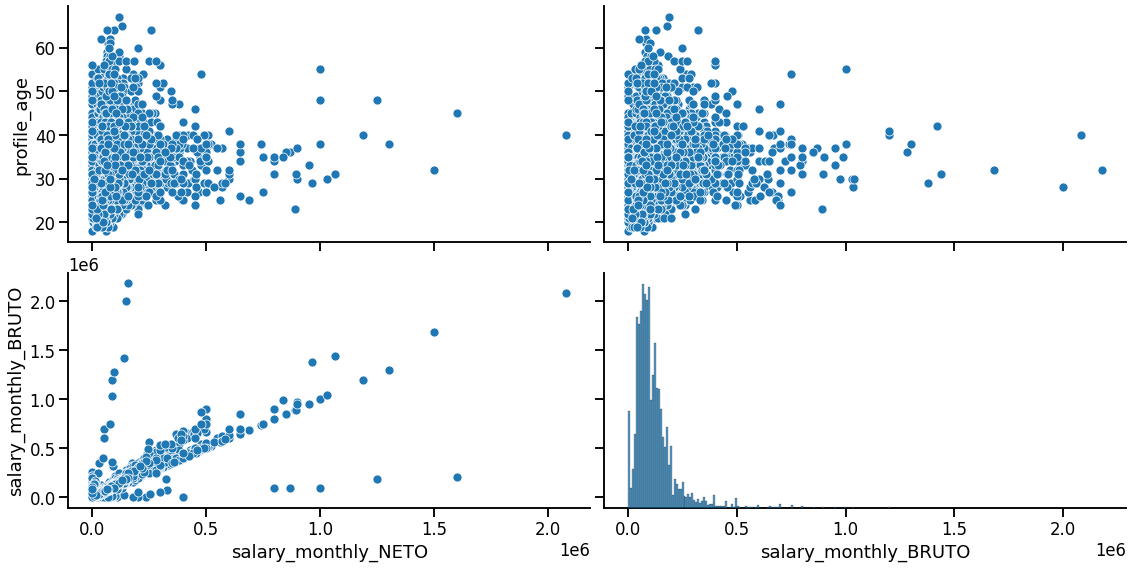

In [44]:
max_age = 99
seaborn.pairplot(data=df[df.profile_age < max_age],
                 y_vars=['profile_age', 'salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO', 'salary_monthly_BRUTO'],
                 aspect=2, height=4)

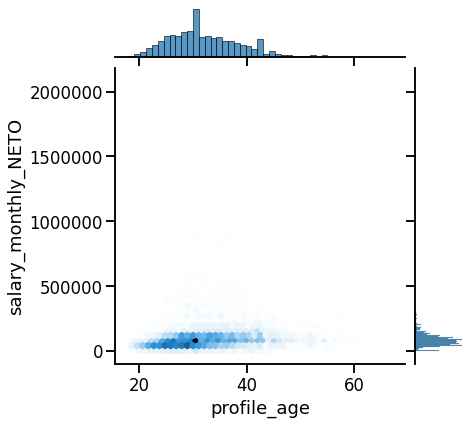

In [45]:
seaborn.jointplot(data=df[df.profile_age < max_age], x='profile_age',
                  y='salary_monthly_NETO', kind='hex', height=6)
# Remove scietific notation
plt.ticklabel_format(style='plain', axis='y')

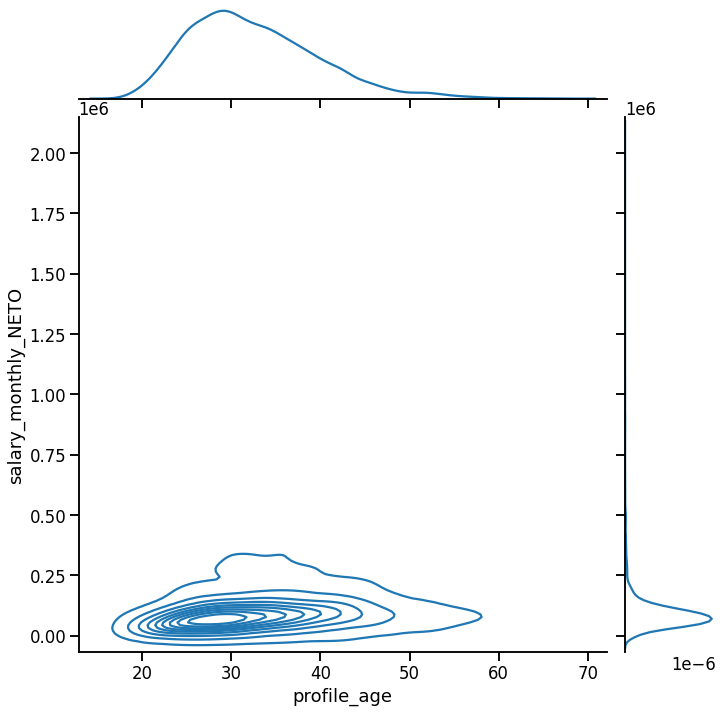

In [46]:
seaborn.jointplot(data=df[df.profile_age < max_age], x='profile_age',
                  y='salary_monthly_NETO', kind='kde', height=10)

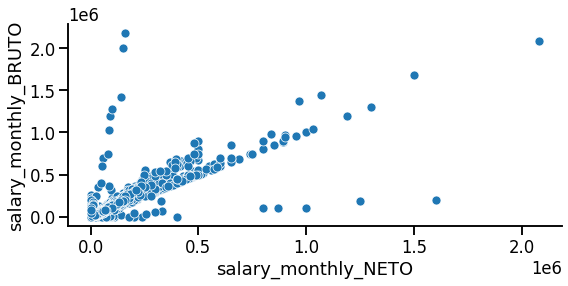

In [47]:
max_age = 99
seaborn.pairplot(data=df[df.profile_age < max_age], y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=4)

**Pregunta** ¿Cuáles le parece que son las ventajas de ver de a dos  (o más) variables simultáneamente?

## Mixtas

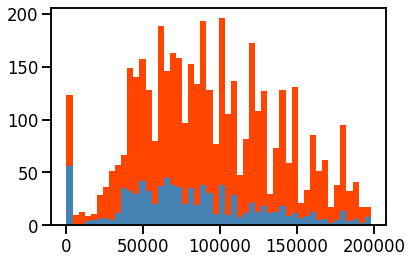

In [48]:
filtered_df= df[df[salary_col] < 200000]
df_H= filtered_df[ filtered_df['profile_gender']=='Hombre']
df_M=filtered_df[ filtered_df['profile_gender']=='Mujer']

plt.hist(df_H[salary_col], color='orangered', bins=50)
plt.hist(df_M[salary_col], color='steelblue', bins=50)
plt.show()


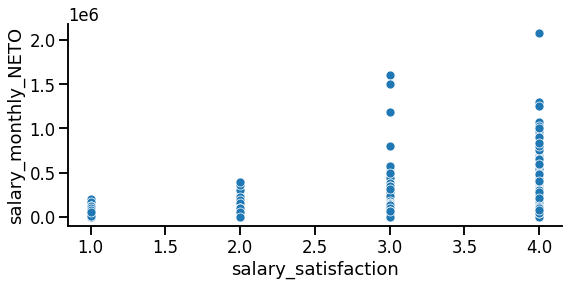

In [49]:
seaborn.pairplot(data=df[df.profile_age < max_age], y_vars=['salary_monthly_NETO'],
                 x_vars=['salary_satisfaction'],
                 aspect=2, height=4)

Una desventaja de usar un pairplot para variables categóricas es la superposición de los puntos que tienen el mismo valor. Un gráfico que soluciona este problema es el `catplot`

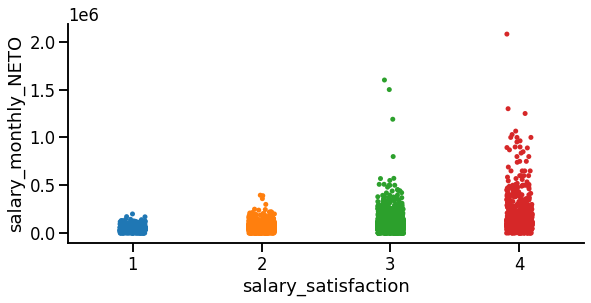

In [50]:
seaborn.catplot(data=df[df.profile_age < max_age], y='salary_monthly_NETO',
                x='salary_satisfaction', height=4, aspect=2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  **contour_kws,


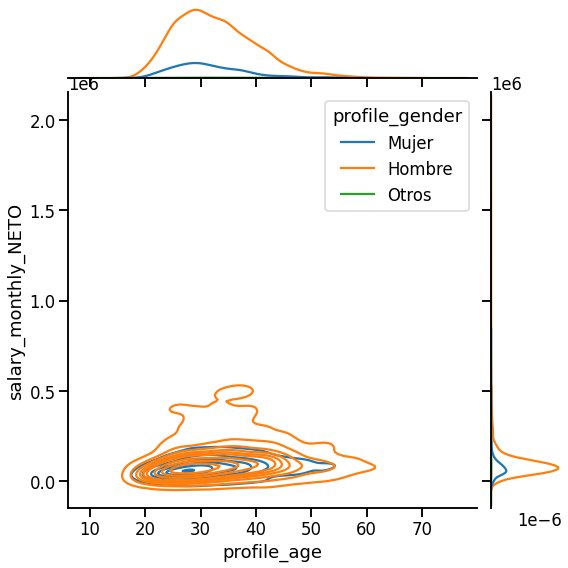

In [51]:
seaborn.jointplot(data=df[df.profile_age < max_age], x='profile_age',
                  y='salary_monthly_NETO', hue='profile_gender',
                  kind='kde', height=8)

# Práctico para resolver en clase

1. Analice las variables `'salary_monthly_BRUTO'` (salario mensual Bruto) y `'salary_monthly_NETO'` (salario Neto) en conjunto, que comentarios puede hacer al respecto?

2. Genere una nueva variable `'salary_monthly_DESCUENTOS'= 'salary_monthly_BRUTO'-'salary_monthly_NETO'`, es decir que contenga los descuentos mensuales. 
  1. ¿Qué concepto matemático utiliza para entender la nueva variable?
  2. Calcule de dos formas diferentes la media muestral de dicha variable. 
  2. Analice la distribución de los datos, su rango de valores e interprete. ¿Qué puede estar pasando? ¿Qué propone como solución?

3. Considerando toda la base:
  1. ¿Que pregunta le interesaría responder?
  2. ¿Que par de variables le conviene analizar en conjunto? Visualice su distribución conjunta. 
  3. ¿Qué medidas podrían resumir la información de la distribución de esas variables juntas? visualícelas e interprete cada una.

4. Resuma:
  1. Si está queriendo analizar el comportamiento conjunto de dos variables, ¿qué gráficos y medidas conviene utilizar? 
  2. ¿Y si ambas variables son numéricas? 
  3. ¿Y si ambas son categóricas? 
  4. ¿Y si una es categórica y la otra numérica? 


# Respuestas práctico

Notas:
- *Crear un gráfico scatter para ver relaciones entre las variables*
- *Extraer variables del df, generar el gráfico y observar*
- *La media de las restas me da la media del descuento*

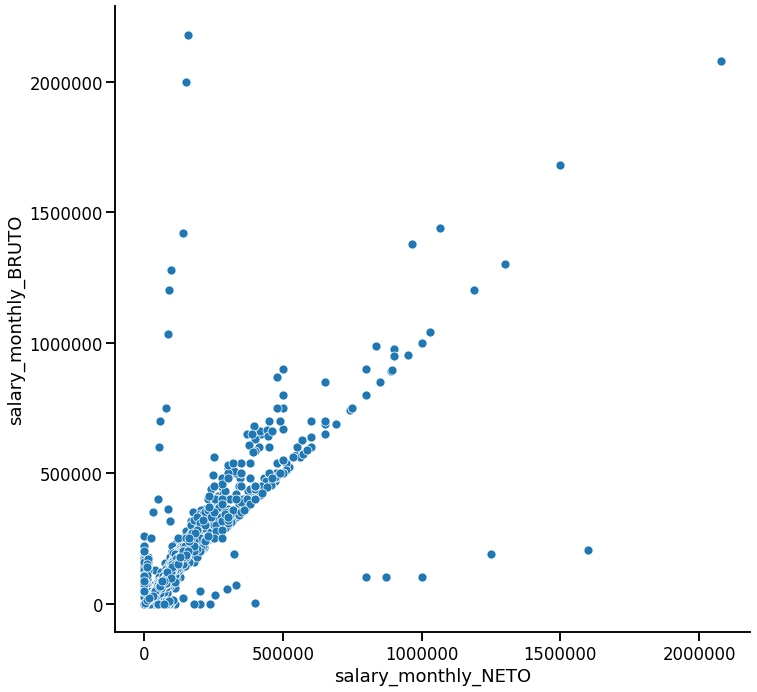

In [20]:
# 1)
max_age = 99
seaborn.pairplot(data=df[df.profile_age < max_age], y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=1, height=10)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

## Conclusiones item 1
- Hay una mayor concentración en la línea principal
- Se ve principalmente una relación positiva entre las variables salario bruto y salario neto.  Además, se ve que hay una importante densidad de datos en donde el  salario bruto es mayor al salario neto, lo cual es lógico y esperado porque el neto surge de descontar las contribuciones y aportes personales al salario bruto.
- El bruto está por encima del neto, hay mucha densidad (registrados formalmente). Se puede apreciar que esta diferencia de sueldo bruto por encima de sueldo neto en valores de $500.000 para abajo.
- La linea que se observa por debajo, en donde el bruto es menor al neto, pareciera indicar informalidad de trabajo o que los datos fueron mal cargados.
- La línea que se observa por arriba, en donde el bruto es mucho mayor al neto puede deberse a una mal carga de los datos por parte de los encuestados.


In [21]:
# 2)
df['salary_monthly_DESCUENTOS'] = df['salary_monthly_BRUTO'] - df['salary_monthly_NETO']

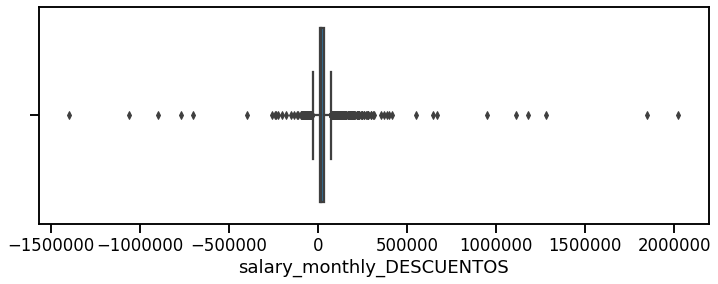

In [22]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df['salary_monthly_DESCUENTOS'])
plt.ticklabel_format(style='plain', axis='x')

In [23]:
# Miremos los cuantiles
df['salary_monthly_DESCUENTOS'].quantile([.01, .02, .03, .035, .04, .05, .95, .98, .99, .995, .998])

0.010    -42638.1
0.020     -6838.4
0.030         0.0
0.035         0.0
0.040         0.0
0.050         0.0
0.950     85000.0
0.980    130000.0
0.990    180000.0
0.995    230590.0
0.998    377088.4
Name: salary_monthly_DESCUENTOS, dtype: float64

In [24]:
# Descartamos
df2 = df[df['salary_monthly_DESCUENTOS'] < df['salary_monthly_DESCUENTOS'].quantile(.998)]
df2 = df2[df2['salary_monthly_DESCUENTOS'] >= 0.0]

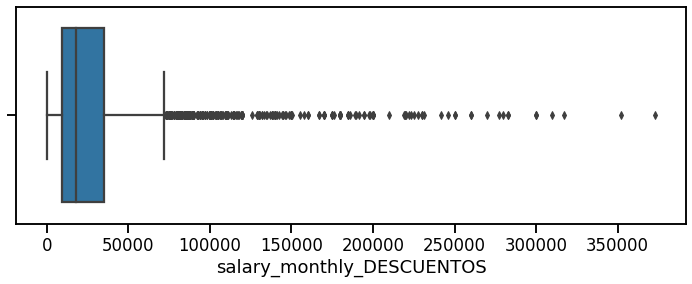

In [25]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df2['salary_monthly_DESCUENTOS'])
plt.ticklabel_format(style='plain', axis='x')

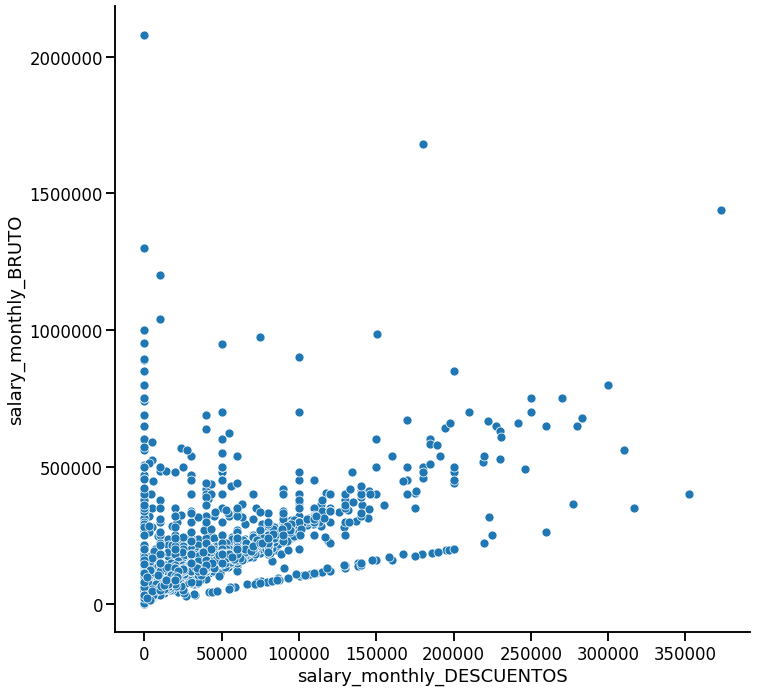

In [26]:
seaborn.pairplot(data=df2, 
                 y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_DESCUENTOS'],
                 aspect=1,
                 height=10)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

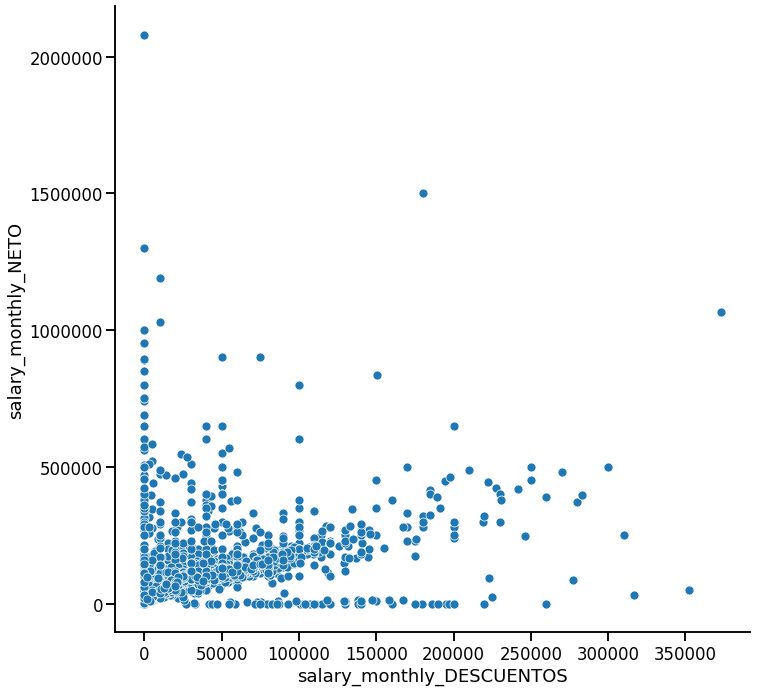

In [27]:
seaborn.pairplot(data=df2, 
                 y_vars=['salary_monthly_NETO'],
                 x_vars=['salary_monthly_DESCUENTOS'],
                 aspect=1,
                 height=10)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

## Conclusiones item 2

- En muchos casos en los que el bruto es mayor que el neto entre 0 y 500000 que es lo esperado) porque es gente reg
- Los que estan por debajo de 0, no están registrados o trabajan para afuera y no tienen descuentos.
- Medio, registrados pero su bruto es igual a su neto

La media de descuento es igual a la resta de la media de bruto y neto?



In [28]:
#media de descuento es que ser la resta de la media de bruto y neto

df2.salary_monthly_DESCUENTOS.mean(), df2.salary_monthly_BRUTO.mean() - df2.salary_monthly_NETO.mean()

(27853.718357830287, 27853.718357830352)

Si, lo es

## Pregunta 3

Me interesaria analizar la relacion entre genero y salario percibido. Acaso las mujeres ganan menos que los hombres por el mismo trabajo?

Para esto, elijo la variable genero y la variable salario neto.

In [29]:
hombres=df2[df2.profile_gender=="Hombre"]
mujeres=df2[df2.profile_gender=="Mujer"]
media_h=hombres.salary_monthly_NETO.mean()
media_m=mujeres.salary_monthly_NETO.mean()
print('Salario neto promedio de un hombre: ', media_h)
print('Salario neto promedio de una mujer: ', media_m)
diferencia_porc= (media_h - media_m)/media_h *100
print("Diferencia salario hombres y mujeres que programan:", diferencia_porc, "% menos")

Salario neto promedio de un hombre:  97976.73149354437
Salario neto promedio de una mujer:  72874.69240816326
Diferencia salario hombres y mujeres que programan: 25.62040874677991 % menos


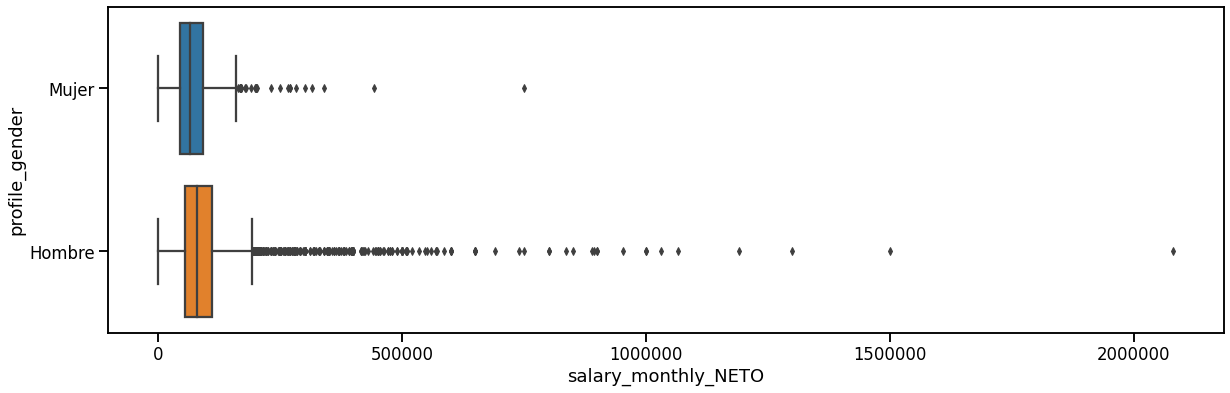

In [37]:
fig = plt.figure(figsize=(20,6))
seaborn.boxplot(data=df2, x=df2.salary_monthly_NETO, y=df2.profile_gender, order=["Mujer","Hombre"]  )
plt.ticklabel_format(style='plain', axis='x')

Las mujeres programadoras que respondieron la encuesta, ganan en promedio 25% menos que sus pares hombres

Analizo sacando los salarios por ensima de un millon de pesos

In [34]:
df3=df2[df2.salary_monthly_NETO<800000]


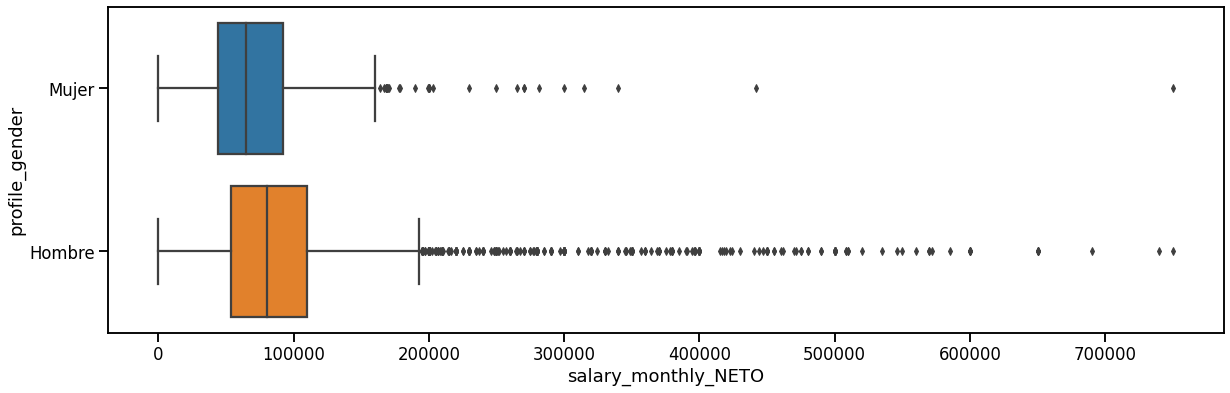

In [36]:
fig = plt.figure(figsize=(20,6))
seaborn.boxplot(data=df3, x=df3.salary_monthly_NETO, y=df3.profile_gender, order=["Mujer","Hombre"] )
plt.ticklabel_format(style='plain', axis='x')

In [39]:
mujeres.salary_monthly_NETO.quantile(0.8), media_h

(98000.0, 97976.73149354437)

Lo que nos reafirma la hipotesis inicial. Podemos ver que un hombre en promedio empieza ganando mas que una mujer (por donde empieza la caja el percentil 25%), y el salario promedio de un hombre es mayor que el del 80% de las mujeres programadoras que contestaron la encuesta 

## Pregunta 4

1 - Si está queriendo analizar el comportamiento conjunto de dos variables, ¿qué gráficos y medidas conviene utilizar?

Va a depender del tipo de variables que quiero analizar.

2 - ¿Y si ambas variables son numéricas?
histograma, de barras, pairplot

3 - ¿Y si ambas son categóricas?
heatmap, conntplot

4 - ¿Y si una es categórica y la otra numérica?
un boxplot, catplot